<h1><center>CSE391 programming for data science</center></h1>
<h1><center>Final </center></h1>
<h1><center>May, 2018 </center></h1>
<h1><center> </center></h1>



# First Name: Jian Zhuang
# Last Name: Chen
# Student Name: jianzhuangchen

# Question 1
Let $\pmb{x}=[x_1,x_2]^T \in \mathcal{R^2}$ be a two dimensional vector drawn from a distribution. Also assume we have collected $N$ samples, $X =\{\pmb{x}_i\}_{i=1}^N$ from the distribution. 

A previous experiment has shown the distribution of this data is of the form:

## Equation 1
$p(\pmb{x}) =p_1*\frac{1}{2\pi|\Sigma_1|^{0.5}}\exp\bigl(-0.5(\pmb{x}-\mu_1)^T\Sigma^{-1}_1(\pmb{x}-\mu_1)\bigr)+p_2*\frac{1}{2*\pi|\Sigma_2|^{0.5}}\exp\bigl(-0.5(\pmb{x}-\mu_2)^T\Sigma^{-1}_2(\pmb{x}-\mu_2)\bigr)$


where $\mu_1 =[0,0]^T$,  $\mu_2 =[3, 3]^T$, $\Sigma_1 = \begin{bmatrix}
    1& 0  \\
    0& 1
\end{bmatrix}$, and $\Sigma_2 = \begin{bmatrix}
    2& 0  \\
    0& 2
\end{bmatrix}$
also $p_1 = 0.3 $ and $p_2 = 0.7$

# Part 1
Write  a python scrip that computes $p(\pmb{x})$. The function should compute the  the probablity for this input p(np.array([1,2,3]),np.array([4,5,6])). Run your function by inputting
np.array([1,2,3]),np.array([4,5,6]) and print out the three probabilities associted with [1,4], [2,5] , and [3,6].

Note that you are only allowed to use  the multivariate_normal function from scipy.stats. You won't get any credit if you use any other library or function. Also you are not allowed to use any loops in your code.

In [1]:
# solution
from scipy.stats import multivariate_normal as mvn
from IPython.display import Image
import random
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

def f(x, y):
    x=np.column_stack([x.ravel(), y.ravel()])
    p1=0.3
    p2=0.7
    u1=np.array([0,0])
    u2=np.array([3,3])
    e1=np.array([[1,0],[0,1]])
    e2=np.array([[2,0],[0,2]])
    return p1*mvn.pdf(x,u1,e1)+p2*mvn.pdf(x,u2,e2)
f(np.array([1,2,3]),np.array([4,5,6]))

array([ 0.01596924,  0.01595955,  0.00587118])

# Part 2

Illustrate a 3-dimensional view of  $p(\pmb{x})$ for $\pmb{x} =[x,y]$ using a meshgrid for the input given in the below cell:

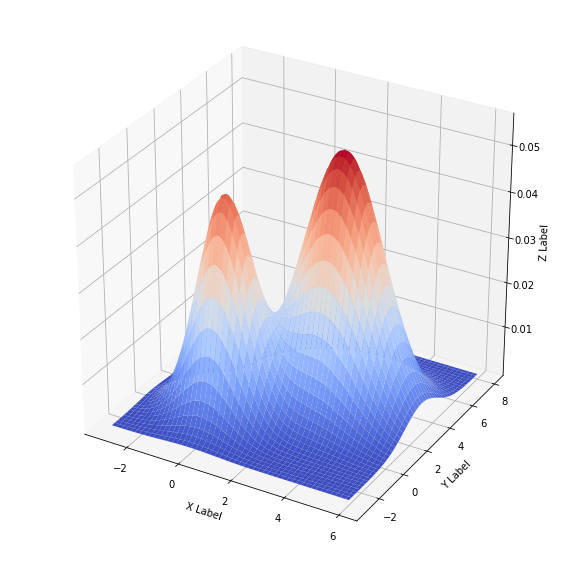

In [11]:
s = 200
x = np.linspace(-3, 6, s)
y = np.linspace(-3, 8, s)
x
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
Z = np.reshape(f(X,Y),(s,s))

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

# Part 3

Now assume we are given some samples from a distribution that has a similar form of the above distribution but with unknown parameters $\mu_1, \mu_2, p_1, \text{and}, p_2$. We have collected 50 samples from this distribution and we aim at  estimating the unknown parameters of the distribution. 
For sake of simplicity we assume that $\Sigma_1, \Sigma_2$ are given.

We rewrite the probability given in Equation1 :


$p(\pmb{x}) =p_1\times G1(\pmb{x},\mu_1,\Sigma_1)+p_2 \times G_2(\pmb{x},\mu_2,\Sigma_2)$

where 
$G_1(\pmb{x},\mu_1,\Sigma_1) = \frac{1}{2\pi|\Sigma_1|^{0.5}}\exp\bigl(-0.5(\pmb{x}-\mu_1)^T\Sigma^{-1}_1(\pmb{x}-\mu_1)\bigr)$

and 

$G_2(\pmb{x},\mu_2,\Sigma_2)= \frac{1}{2*\pi|\Sigma_2|^{0.5}}\exp\bigl(-0.5(\pmb{x}-\mu_2)^T\Sigma^{-1}_2(\pmb{x}-\mu_2)\bigr)$

The parameters  can be estimated using an iterative algorithm in three steps:


Before we start we need to initialize $\mu_1, \mu_2, p_1, \text{and}, p_2$ with some random initila values; here assume the initial values for $p_1 = p_2 = 0.5$ and $\mu_1,=[0,0]^T$, $\mu_2 =[1,1]^T$.

After the initialization, the steps are as follows:

1- First you calculate an assignment value $w_{ik}$ which computes the chance that sample $i$ drawn from the $k$th probablity function. For our case $k={1,2}$, $i={1,2,\ldots,50}$

$\large w_{i1}= \frac{G_1(\pmb{x}_i,\mu_1,\Sigma_1)}{G_1(\pmb{x}_i,\mu_1,\Sigma_1)+G_2(\pmb{x}_i,\mu_2,\Sigma_2)}$

and 

$\large w_{i2}= \frac{G_2(\pmb{x}_i,\mu_2,\Sigma_2)}{G_1(\pmb{x}_i,\mu_1,\Sigma_1)+G_2(\pmb{x}_i,\mu_2,\Sigma_2)}$



2- Now given $w_{ik}$, we compute the $p_1$ and $p_2 $ as follows

$p_1 = \frac{N_1}{N}$

and

$p_2 = \frac{N_2}{N}$


where $ N$ = number of samples and


$N_1 =\sum_{i=1}^N w_{i1} $

and

$N_2 =\sum_{i=1}^N w_{i2} $


Also

$\mu_1 = \frac{1}{N}\sum_{i=1}^N w_{i1}\pmb{x_i}$

$\mu_2 = \frac{1}{N}\sum_{i=1}^N w_{i2}\pmb{x_i}$



3- After computing these new values for $\mu_1, \mu_2, p_1,\text{and}\, p_2$ we compute
$p(\pmb{x}_i) =p_1*G_1(\pmb{x}_i,\mu_1,\Sigma_1)+p_2*G_2(\pmb{x}_i,\mu_2,\Sigma_2)$

for all $i =1,\ldots,50$. Next we determine the absolute difference values between  $\sum_i \log p^{\text{new}}(\pmb{x}_i)$ and  $\sum_i \log p^{\text{old}}(\pmb{x}_i)$. If this difference  is smaller than 0.01 we stop , otherwise we continue until the maximum number of iterations is reached.


## Implemention
Write a function to implement the above iterative algorithm.
Let's call this function 

compute_pdf_for_two(X, mu1, mu2, Sigma1, Sigma2 , p1, p2, max_iter = 100)



In [3]:
from scipy.stats import multivariate_normal as mvn
import random
import numpy as np
import pandas as pd
import scipy.stats as st





def compute_pdf_for_two(X,mu1, mu2, Sigma1, Sigma2 , p1, p2, max_iter = 100)
:
   


SyntaxError: invalid syntax (<ipython-input-3-97ef4ae28bfb>, line 11)

In [ ]:
# here is how to check your function
# generate samples
n_samples = 50

# this will generate the data for your test
np.random.seed(0)
K = np.array([[0., 1], [1.8, 0.5]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), K),
          0.4 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

# initial values
p1 =p2 =0.5
mu1= np.array([0,0])
mu2 = np.array([1,1])
Sigma1 = np.array([[1,0],[0,1]])
Sigma2 = np.array([[2,0],[0,2]])
   
#check your function
compute_pdf_for_two(X, mu1, mu2, Sigma1, Sigma2 , p1, p2, max_iter = 100)

# Question 2

In this problem we would like to train a model that can hopefully predict  whether two genes are synthetic lethal. Hereby, we call these pairs of genes the SL genes. Two genes are SL when activation or deactivation of both cause cell death. Note that no knowledge of biology or Bioinformatics is needed for this problem.


We have collected $N$ pairs of SL genes. For each pair, we extracted 8 features (4 for each gene). We would like to investigate if these features are predictive of SL or not. Hence we have a binary classification problem in which we have an $N\times8$ feature matrix for the positive class. 
Unfortunately, we however don't have the non-SL pair features--- hereby we name it the  Null class (AKA negative class). Nonetheless, we can easily generate the Null class features by shuffling the member of each SL pairs and also their corresponding features.

You are given an excel file in which there are 5 columns. The first column contains  the gene names and the 2-5 columns contain 4 features associated with a gene in each row. Note that the original $N\times8$ matrix is flattened--- the excel file matrix size is $2N\times 4$. That means the first gene is SL pair with the $N+1$ gene in the excel file. Also the second gene is the SL pair with
the $N+2$ gene in the excel file, and so on.

So you need to reshape (or fold (down-up) the excel file matrix). After reshaping  you are going to have  an $N \times 10$ matrix. The first two columns are the pair of SL genes and the rest  $N \times 8 $ are features associated with each pair.

You need to generate the null class by permuting the 1,3 5, and 7 columns of the feature matrix ($N \times 8 $). This way you remove any meaningful relation between SL pairs and generate the null class.


Now having two $N \times 8 $ matrices, one for SL (positive class )and one for non-SL (negative class),
apply  Naive Bayes, SVM, and random forest classifiers to  fit a model to  data.  Split the data to 80 % training and 20 test and run the classifiers for three folds --- meaning do the permutation and run the classifier three times.

At the end, report the performance of these three classifiers in terms of accuracy, FDR,  and F1 in a bar plot. Note that you should show three bar plots, each for one of these metrics. Play with the parameters of the classifies and report the winner. Your script when run should show these three bar plots.




In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm
from pandas_ml import ConfusionMatrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

fpr1=[]
f11=[]
accuracy1=[]

fpr2=[]
f12=[]
accuracy2=[]

fpr3=[]
f13=[]
accuracy3=[]
for i in range(3):
    #1- read the data
    data=pd.read_csv("CSE391_finalExam1.csv")

    # 2- preporocess the data in term of missing values and clean the data for further processing.
    # Describe what you have done.
    data.isnull().sum()
    # no missing value found

    # extract the features  and gene labels
    label = data["Genes"]
    features = data.drop(["Genes"],axis=1)

    # reshape the gene vector to make the list of Sl pairs in an M*2 array where M denote the number of pairs
    labelpair1 = label[:(int)(len(label)/2)]
    labelpair2 = label[(int)(len(label)/2):]
    labelpair=labelpair1.str.cat(labelpair2,sep=',')
    labelpair

    # reshape the feature matrix to have a M*8 matrix.
    features1= features[:(int)(len(label)/2)]
    features2= features[(int)(len(label)/2):]
    features1.reset_index(drop=True, inplace=True)
    features2.reset_index(drop=True, inplace=True)
    features=pd.concat([features1, features2], axis=1, ignore_index=True)
    # permute 

    null=pd.DataFrame(features)
    null[[1]]=np.random.permutation(features[[1]])
    null[[3]]=np.random.permutation(features[[3]])
    null[[5]]=np.random.permutation(features[[5]])
    null[[7]]=np.random.permutation(features[[7]])
    null

    # concatenate the target and null feature matrices
    new = pd.concat([null,features])
    new.reset_index(drop=True, inplace=True)

    # make a label vector such that the first  4,735 samples labeled 1 (target) and others labeled zeros (null samples)
    new["label"]=1
    new[(int)(len(label)/2):]["label"]=0
    X=new.drop("label",axis=1)
    y=new["label"]

    # shuffle and split training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    # convert to 1-d


    # apply the three classifiers
    from sklearn.naive_bayes import GaussianNB
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    GaussianNB(priors=None)
    y_pred=clf.predict(X_test)
    # compute the metrics accuracy, FDR, and F1
    print("GaussianNB")
    print(confusion_matrix(y_test, y_pred))
    print("fpr",confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred).sum())
    print("f1",f1_score(y_test, y_pred, average='binary') )
    print("accuracy",accuracy_score(y_test, y_pred))
    fpr1.append(confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred).sum())
    f11.append(f1_score(y_test, y_pred, average='binary'))
    accuracy1.append(accuracy_score(y_test, y_pred))
    
    from sklearn.svm import SVC
    clf = SVC()
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print("SVC")
    print(confusion_matrix(y_test, y_pred))
    print("fpr",confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred).sum())
    print("f1",f1_score(y_test, y_pred, average='binary') )
    print("accuracy",accuracy_score(y_test, y_pred))
    fpr2.append(confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred).sum())
    f12.append(f1_score(y_test, y_pred, average='binary'))
    accuracy2.append(accuracy_score(y_test, y_pred))
    
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(max_depth=20, random_state=0)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print("RandomForestClassifier")
    print(confusion_matrix(y_test, y_pred))
    print("fpr",confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred).sum())
    print("f1",f1_score(y_test, y_pred, average='binary') )
    print("accuracy",accuracy_score(y_test, y_pred))
    fpr3.append(confusion_matrix(y_test, y_pred)[0][1]/confusion_matrix(y_test, y_pred).sum())
    f13.append(f1_score(y_test, y_pred, average='binary'))
    accuracy3.append(accuracy_score(y_test, y_pred))
    
fpr1=np.mean(np.array(fpr1))
f11=np.mean(np.array(f11))
accuracy1=np.mean(np.array(accuracy1))

fpr2=np.mean(np.array(fpr2))
f12=np.mean(np.array(f12))
accuracy2=np.mean(np.array(accuracy2))

fpr3=np.mean(np.array(fpr3))
f13=np.mean(np.array(f13))
accuracy3=np.mean(np.array(accuracy3))

fpr=np.array([fpr1,fpr2,fpr3])
f1=np.array([f11,f12,f13])
accuracy=np.array([accuracy1,accuracy2,accuracy3])


import matplotlib.pyplot as plt
 
# data to plot
n_groups = 3

 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8
 
rects1 = plt.bar(index, fpr, bar_width,
                 alpha=opacity,
                 color='b',
                 label='fpr')
 
rects2 = plt.bar(index + bar_width, f1, bar_width,
                 alpha=opacity,
                 color='g',
                 label='f1')
rects3 = plt.bar(index + bar_width+bar_width, accuracy, bar_width,
                 alpha=opacity,
                 color='r',
                 label='accuracy')
 

plt.xticks(index + bar_width+bar_width, ('GaussianNB', 'SVC', 'RandomForestClassifier'))
plt.legend()
 
plt.tight_layout()
plt.show()


# RandomForestClassifier BEST